In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style('whitegrid')
sns.color_palette('dark')
plt.style.use('fivethirtyeight')

In [3]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
df =pd.read_csv('Product_Exclusive_Classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [6]:
df['id'] = df['id'].astype(str)

In [7]:
df['number_of_reviews'].fillna(0, inplace=True)

In [8]:
df['number_of_reviews'] = df['number_of_reviews'].astype(int)

In [9]:
df['love'].fillna(0, inplace=True)

In [10]:
df['love'] = df['love'].astype(int)

In [11]:
df['price'].fillna(0, inplace=True)

In [12]:
df['price'] = df['price'].astype(int)

In [13]:
df['value_price'].fillna(0, inplace=True)

In [14]:
df['value_price'] = df['value_price'].astype(int)

In [15]:
df['exclusive'] = df['exclusive'].astype(bool)

Type data diganti id, number_of_reviews, love, price, value_price diganti integer. exclusive diganti boolean.
data yang hilang berada di kolom category, rating, number_of_reviews, love, price, value_price   

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   object 
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  8000 non-null   int32  
 5   love               8000 non-null   int32  
 6   price              8000 non-null   int32  
 7   value_price        8000 non-null   int32  
 8   exclusive          8000 non-null   bool   
dtypes: bool(1), float64(1), int32(4), object(3)
memory usage: 382.9+ KB


In [17]:
df = df.loc[:, ~df.T.duplicated(keep='first')]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   object 
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  8000 non-null   int32  
 5   love               8000 non-null   int32  
 6   price              8000 non-null   int32  
 7   value_price        8000 non-null   int32  
 8   exclusive          8000 non-null   bool   
dtypes: bool(1), float64(1), int32(4), object(3)
memory usage: 382.9+ KB


In [19]:
df.sample(10)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
5562,2155182,INC.redible,Lip Sets,3.5,3,3300,18,36,False
3939,2025633,Drunk Elephant,Moisturizers,4.0,4000,233700,68,68,True
3540,1979616,Lancôme,Face Serums,4.5,32,7100,80,80,False
2632,1868264,IT Cosmetics,Setting Spray & Powder,4.0,455,33600,30,30,False
2160,1795236,Guerlain,Bronzer,4.5,356,22500,54,54,False
143,654236,Murad,Toners,4.5,850,17600,26,26,False
667,1370766,SEPHORA COLLECTION,Eyeliner,4.0,1000,20700,12,12,True
3984,2029429,IT Cosmetics,Moisturizers,3.5,31,2600,17,17,False
4232,2044147,HERMÈS,Bath & Shower,0.0,0,136,69,69,False
352,1074442,Hourglass,Face Primer,4.5,6000,202700,54,54,False


In [20]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     0
love                  0
price                 0
value_price           0
exclusive             0
dtype: int64

In [21]:
numericals = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']
categoricals = ['id', 'brand', 'category', 'exclusive']

In [22]:
df.duplicated().sum()

0

In [23]:
df.duplicated(subset=['id', 'brand', 'category', 'number_of_reviews', 'love', 'price', 'value_price']).sum()

0

In [24]:
df[numericals].describe()

,rating,number_of_reviews,love,price,value_price
count,7905.000000,8000.000000,8.000000e+03,8000.000000,8000.000000
mean,4.085136,303.232875,1.748931e+04,49.832500,50.856250
std,0.761069,931.255763,4.417402e+04,46.879835,48.490427
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,4.000000,56.000000,5.400000e+03,35.000000,35.000000
75%,4.500000,230.250000,1.530000e+04,59.000000,60.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [25]:
df[categoricals].describe()

,id,brand,category,exclusive
count,8000,8000,7987,8000
unique,7951,310,142,2
top,1723881,SEPHORA COLLECTION,Perfume,False
freq,2,492,619,5953


In [26]:
df['brand'].fillna(df['brand'].mode()[0], inplace=True)

In [27]:
df['category'].fillna(df['category'].mode()[0], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   object 
 1   brand              8000 non-null   object 
 2   category           8000 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  8000 non-null   int32  
 5   love               8000 non-null   int32  
 6   price              8000 non-null   int32  
 7   value_price        8000 non-null   int32  
 8   exclusive          8000 non-null   bool   
dtypes: bool(1), float64(1), int32(4), object(3)
memory usage: 382.9+ KB


In [29]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   object 
 1   brand              8000 non-null   object 
 2   category           8000 non-null   object 
 3   rating             8000 non-null   float64
 4   number_of_reviews  8000 non-null   int32  
 5   love               8000 non-null   int32  
 6   price              8000 non-null   int32  
 7   value_price        8000 non-null   int32  
 8   exclusive          8000 non-null   bool   
dtypes: bool(1), float64(1), int32(4), object(3)
memory usage: 382.9+ KB


In [30]:
df.duplicated().sum()

0

In [31]:
from scipy import stats

In [32]:
print(f'jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))

for col in ['rating', 'number_of_reviews', 'love', 'price']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]

print(f'jumlah baris setelah memfilter outlier: {len(df)}')

jumlah baris sebelum memfilter outlier: 8000
jumlah baris setelah memfilter outlier: 7484


<Axes: xlabel='rating', ylabel='Density'>

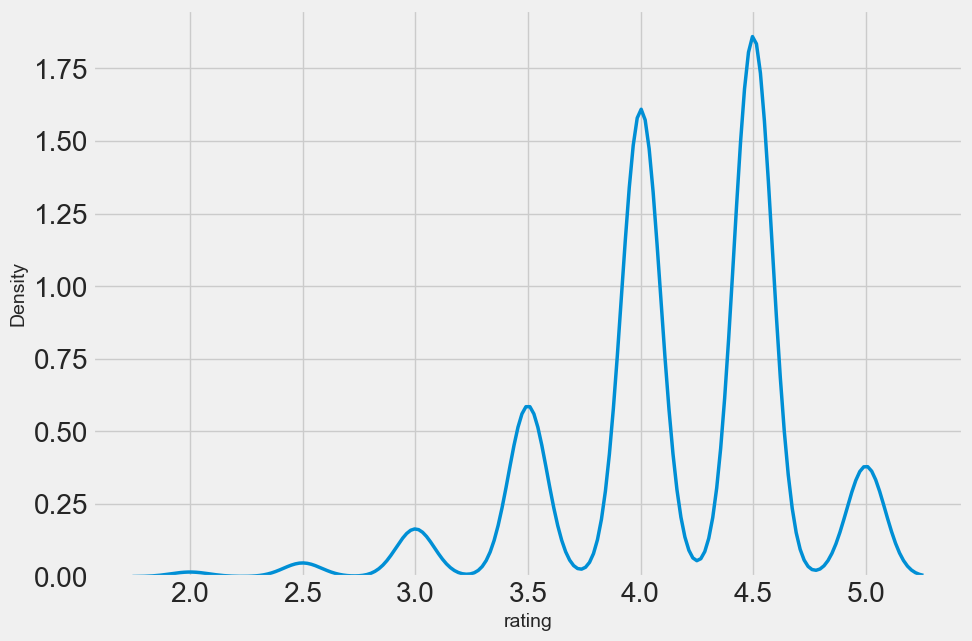

In [33]:
sns.kdeplot(df['rating'])

<Axes: xlabel='rating', ylabel='Density'>

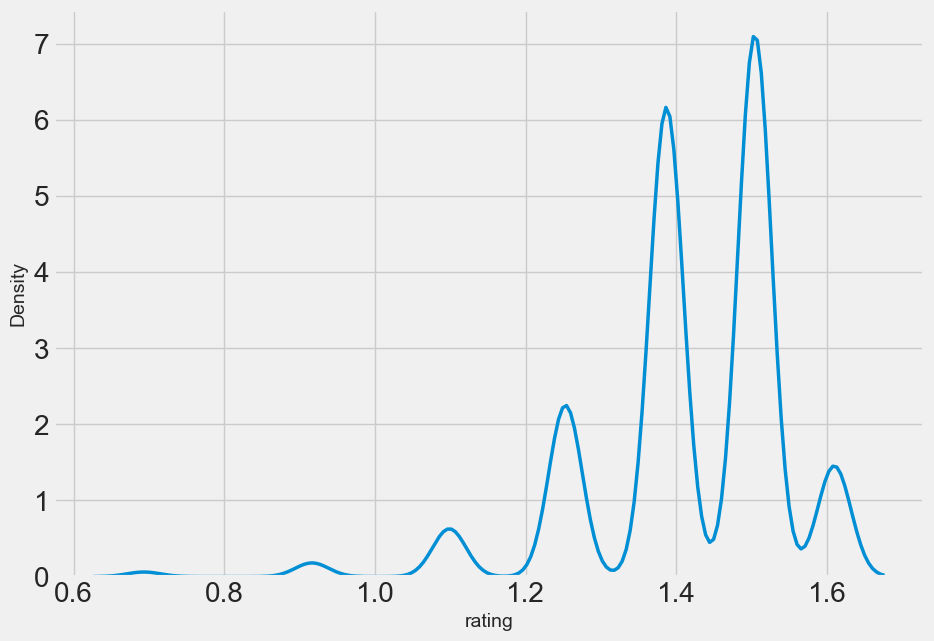

In [34]:
sns.kdeplot(np.log(df['rating']))

<Axes: xlabel='number_of_reviews', ylabel='Density'>

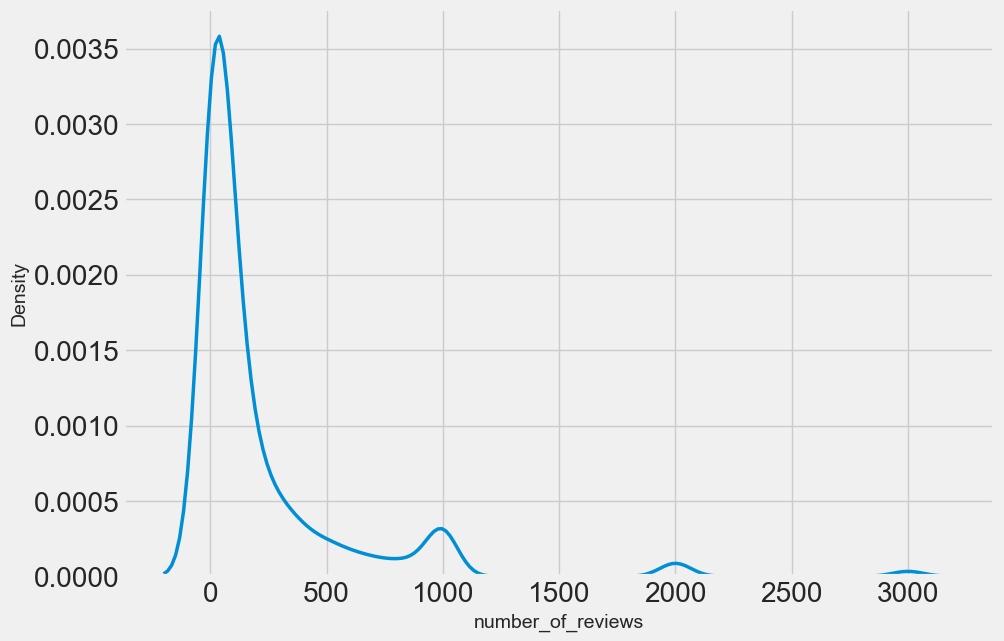

In [35]:
sns.kdeplot(df['number_of_reviews'])

<Axes: xlabel='number_of_reviews', ylabel='Density'>

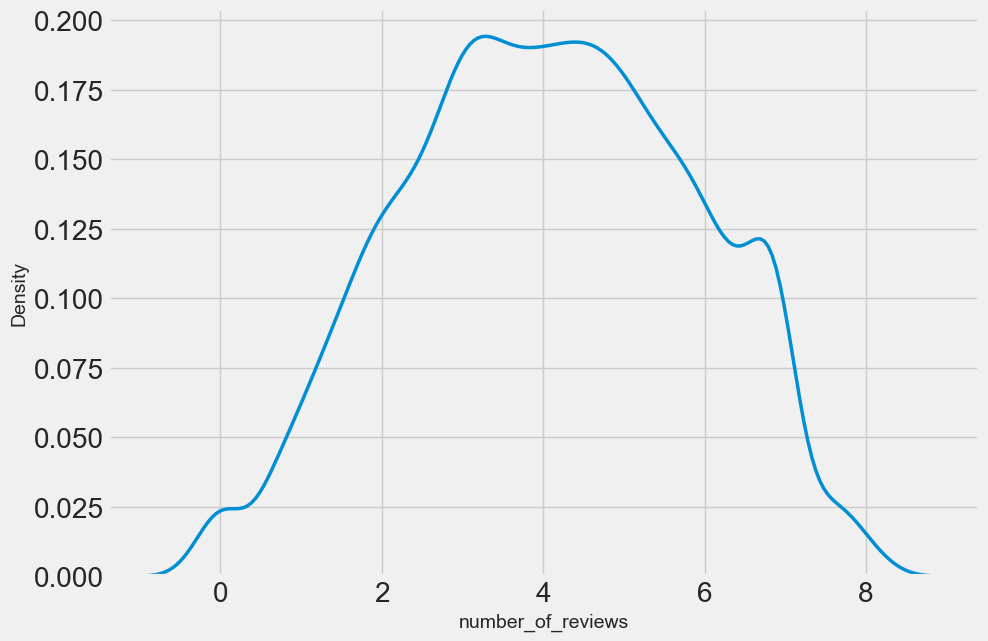

In [36]:
sns.kdeplot(np.log(df['number_of_reviews']))

<Axes: xlabel='love', ylabel='Density'>

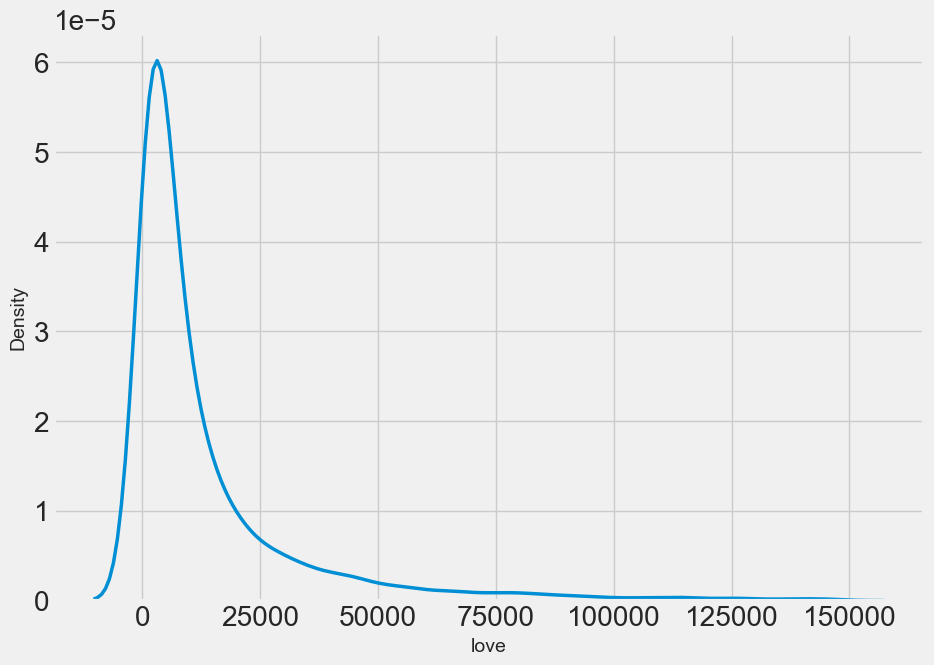

In [37]:
sns.kdeplot(df['love'])

<Axes: xlabel='love', ylabel='Density'>

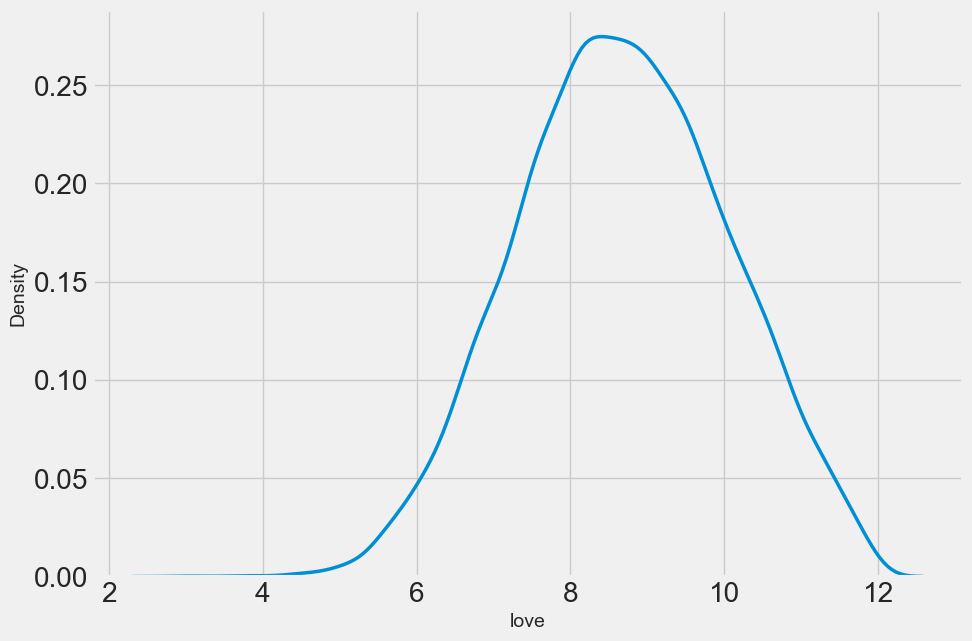

In [38]:
sns.kdeplot(np.log(df['love']))

<Axes: xlabel='price', ylabel='Density'>

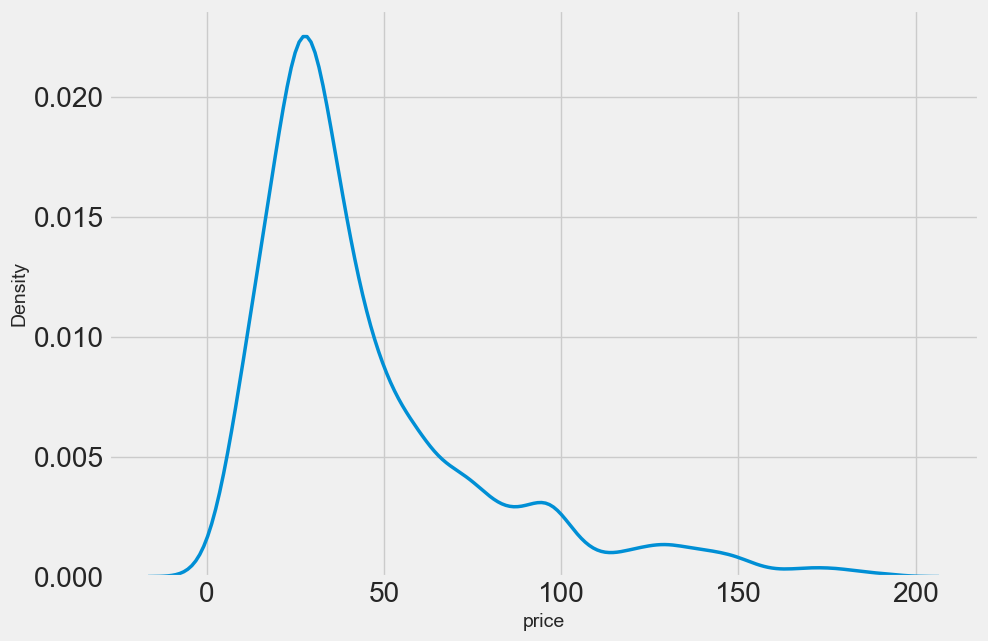

In [39]:
sns.kdeplot(df['price'])

<Axes: xlabel='price', ylabel='Density'>

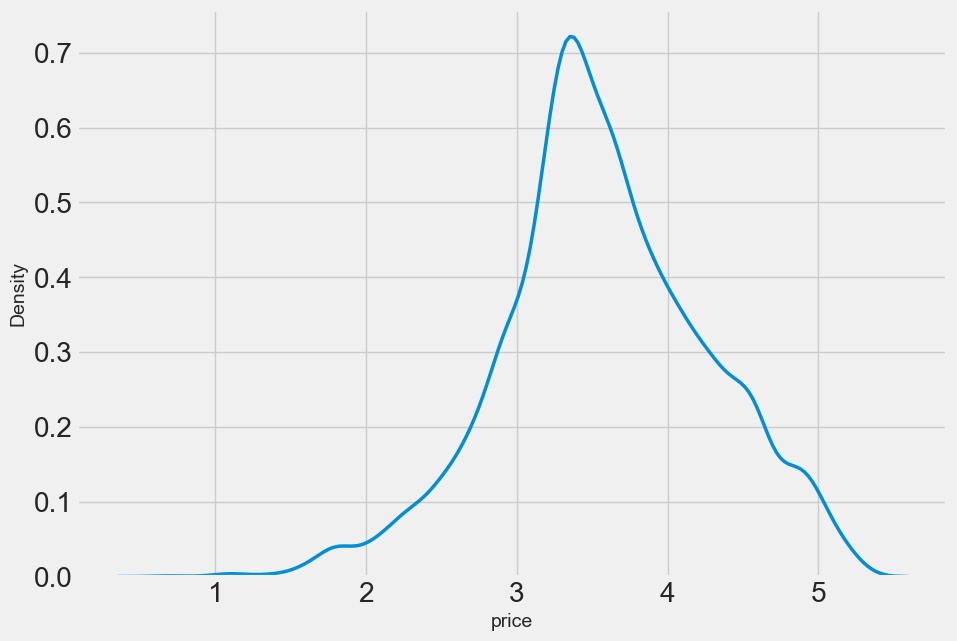

In [40]:
sns.kdeplot(np.log(df['price']))

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [42]:
df['price_norm'] = MinMaxScaler().fit_transform(df['price'].values.reshape(len(df), 1))
df['price_std'] = StandardScaler().fit_transform(df['price'].values.reshape(len(df), 1))

In [43]:
df[['price', 'price_norm', 'price_std']].describe()

,price,price_norm,price_std
count,7484.000000,7484.000000,7.484000e+03
mean,45.077766,0.237251,2.278598e-17
std,32.966440,0.173508,1.000067e+00
min,0.000000,0.000000,-1.367475e+00
25%,24.000000,0.126316,-6.394131e-01
50%,34.000000,0.178947,-3.360541e-01
75%,56.000000,0.294737,3.313359e-01
max,190.000000,1.000000,4.396347e+00


In [44]:
df['rating_norm'] = MinMaxScaler().fit_transform(df['rating'].values.reshape(len(df), 1))
df['rating_std'] = StandardScaler().fit_transform(df['rating'].values.reshape(len(df), 1))

In [45]:
df[['rating', 'rating_norm', 'rating_std']].describe()

,rating,rating_norm,rating_std
count,7484.000000,7484.000000,7.484000e+03
mean,4.161188,0.720396,-3.569803e-16
std,0.506733,0.168911,1.000067e+00
min,2.000000,0.000000,-4.265232e+00
25%,4.000000,0.666667,-3.181144e-01
50%,4.000000,0.666667,-3.181144e-01
75%,4.500000,0.833333,6.686650e-01
max,5.000000,1.000000,1.655444e+00


In [46]:
categoricals = ['id', 'brand', 'category', 'exclusive']

In [47]:
df[categoricals].describe()

,id,brand,category,exclusive
count,7484,7484,7484,7484
unique,7441,308,142,2
top,2258515,SEPHORA COLLECTION,Perfume,False
freq,2,454,581,5541


In [48]:
df['exclusive'] = df['exclusive'].astype('category').cat.codes

In [49]:
for cat in ['brand']:
    onehots = pd.get_dummies(df['brand'], prefix='kosmetik')
    df = df.join(onehots)

In [50]:
for cat in ['category']:
    onehots = pd.get_dummies(df['category'], prefix='category')
    df = df.join(onehots)

In [51]:
df_new = df.drop(columns=['exclusive', 'brand', 'category']).copy()

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7998
Columns: 460 entries, id to category_no category
dtypes: float64(5), int32(4), object(1), uint8(450)
memory usage: 4.0+ MB


In [53]:
threshold = 0.7  
df_new = df_new.corr().abs() > threshold


correlated_cols = df_new.columns[df_new.any()].tolist()
df_high_corr = df[correlated_cols]

In [54]:
df_high_corr = df_high_corr[df_high_corr != 1.0]

In [78]:
print(df_high_corr.head(1))

   rating  number_of_reviews  love  price  value_price  price_norm  price_std  \
0     5.0               46.0     0     50           50    0.352113   0.241633   

   rating_norm  rating_std  kosmetik_8Greens  ...  category_Skincare Sets  \
0          NaN    1.744054               0.0  ...                     0.0   

   category_Spa Tools  category_Sponges & Applicators  category_Sunscreen  \
0                 0.0                             0.0                 0.0   

   category_Teeth Whitening  category_Tinted Moisturizer  category_Toners  \
0                       0.0                          0.0              0.0   

   category_Tweezers & Eyebrow Tools  category_Value & Gift Sets  \
0                                0.0                         0.0   

   category_no category  
0                   NaN  

[1 rows x 454 columns]


   rating  number_of_reviews  love  price  value_price  price_norm  price_std  \
0     5.0               46.0     0     50           50    0.263158    0.14932   

   rating_norm  rating_std  kosmetik_8Greens  ...  category_Skincare Sets  \
0          1.0    1.655444               0.0  ...                     0.0   

   category_Spa Tools  category_Sponges & Applicators  category_Sunscreen  \
0                 0.0                             0.0                 0.0   

   category_Teeth Whitening  category_Tinted Moisturizer  category_Toners  \
0                       0.0                          0.0              0.0   

   category_Tweezers & Eyebrow Tools  category_Value & Gift Sets  \
0                                0.0                         0.0   

   category_no category  
0                   NaN  

[1 rows x 459 columns]


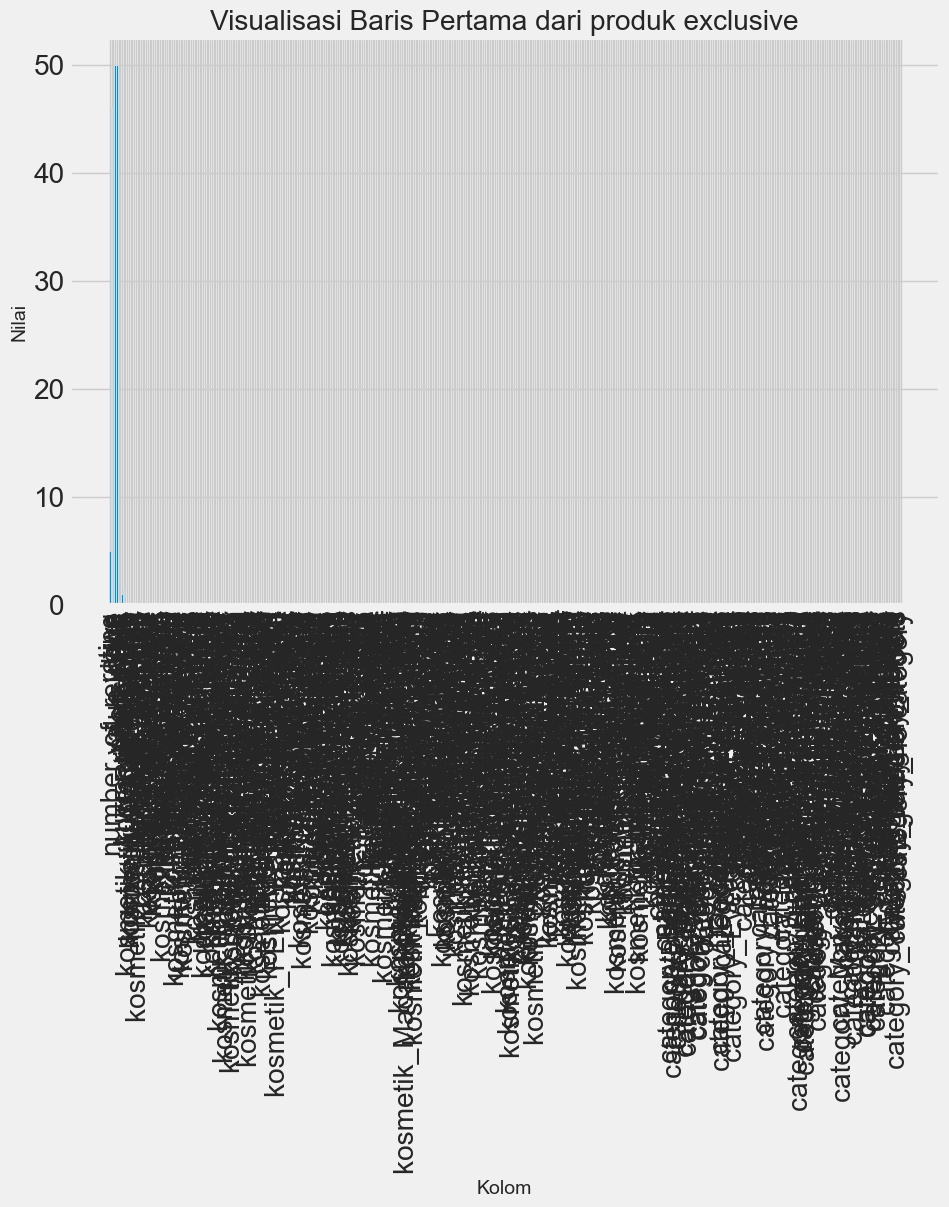

In [55]:
print(df_high_corr.head(1))

row = df_high_corr.iloc[0]  
plt.bar(row.index, row.values)  
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.title('Visualisasi Baris Pertama dari produk exclusive')
plt.xticks(rotation=90)  
plt.show() 

In [62]:
print(df_high_corr.head(459))

     rating  number_of_reviews   love  price  value_price  price_norm  \
0       5.0               46.0      0     50           50    0.263158   
5       4.5               94.0   3000     78           78    0.410526   
6       5.0               31.0   3300     94           94    0.494737   
7       4.5              164.0   4200     62           62    0.326316   
8       4.5              127.0   2900     86           86    0.452632   
..      ...                ...    ...    ...          ...         ...   
487     4.5              353.0  16100     50           50    0.263158   
488     4.0             1000.0  30900     29           29    0.152632   
489     5.0              447.0  68800     85           85    0.447368   
490     4.5              341.0   8900     92           92    0.484211   
491     4.5              159.0   5600     76           76    0.400000   

     price_std  rating_norm  rating_std  kosmetik_8Greens  ...  \
0     0.149320     1.000000    1.655444               0.0

In [66]:
del df_high_corr['value_price']

KeyError: 'value_price'

In [67]:
print(df_high_corr.head(0))

Empty DataFrame
Columns: [rating, number_of_reviews, love, price, price_norm, price_std, rating_norm, rating_std, kosmetik_8Greens, kosmetik_AERIN, kosmetik_ALTERNA Haircare, kosmetik_AMOREPACIFIC, kosmetik_Acqua Di Parma, kosmetik_Aether Beauty, kosmetik_Algenist, kosmetik_Alpha-H, kosmetik_Anastasia Beverly Hills, kosmetik_Anthony, kosmetik_Antonym, kosmetik_Aquis, kosmetik_Armani Beauty, kosmetik_Artis, kosmetik_Artist Couture, kosmetik_Atelier Cologne, kosmetik_BALENCIAGA, kosmetik_BECCA, kosmetik_BERDOUES, kosmetik_BURBERRY, kosmetik_BVLGARI, kosmetik_BeautyBio, kosmetik_Benefit Cosmetics, kosmetik_Bio Ionic, kosmetik_Biossance, kosmetik_Bite Beauty, kosmetik_Black Up, kosmetik_Blinc, kosmetik_Bobbi Brown, kosmetik_Briogeo, kosmetik_Bumble and bumble, kosmetik_Buxom, kosmetik_By Rosie Jane, kosmetik_Bésame Cosmetics, kosmetik_CHANEL, kosmetik_CLEAN RESERVE, kosmetik_CLINIQUE, kosmetik_COOLA, kosmetik_COVER FX, kosmetik_Calvin Klein, kosmetik_Capri Blue, kosmetik_Carolina Herrera, 